# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [57]:
!pip install pipreqs > /dev/null

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [58]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
print("Ukuran Data:", df.shape)
df.head()

Ukuran Data: (5630, 20)


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [59]:
# Cek info tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [60]:
# Cek jumlah missing value per kolom
print("\nJumlah Missing Value:")
print(df.isnull().sum())


Jumlah Missing Value:
CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [61]:
# Cek baris duplikat
df.duplicated().sum()

np.int64(0)

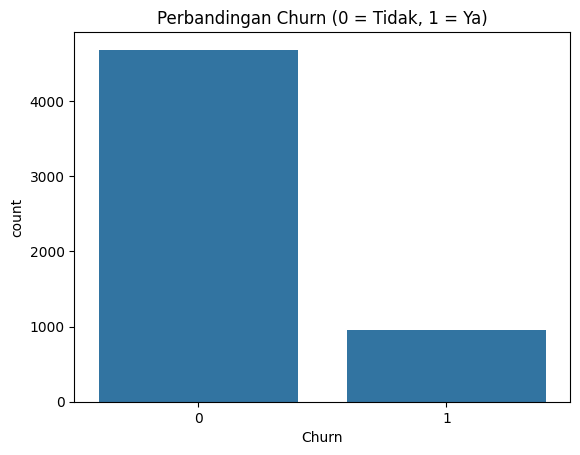

In [62]:
# Cek distribusi target (Churn)
sns.countplot(x='Churn', data=df)
plt.title('Perbandingan Churn (0 = Tidak, 1 = Ya)')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [63]:
# Menangani data yang hilang
#fitur kategorikal
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

#fitur numerik
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,0
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,0
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0


In [64]:
# Menghapus data duplikat
df.drop_duplicates(keep='first')

df.duplicated().sum()

np.int64(0)

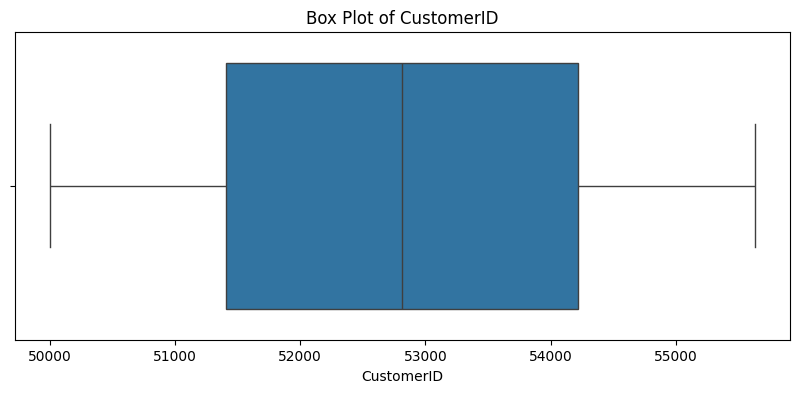

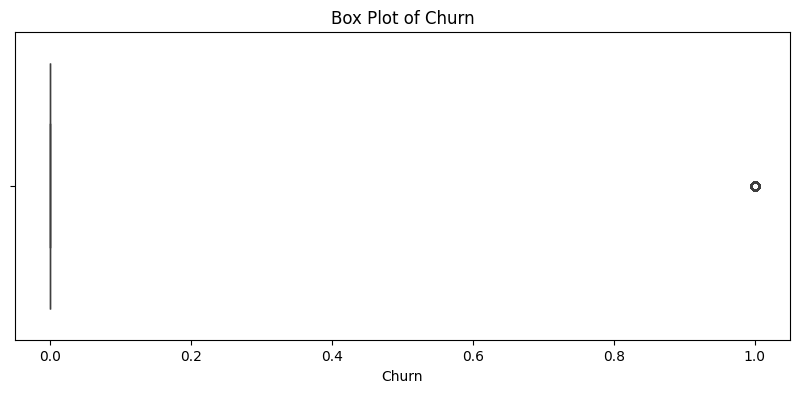

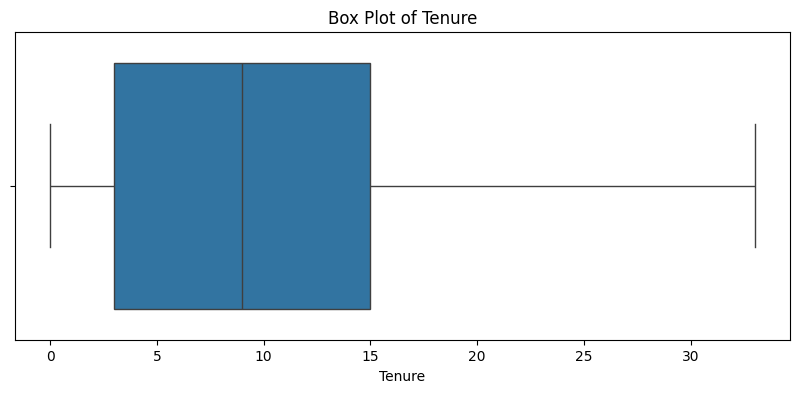

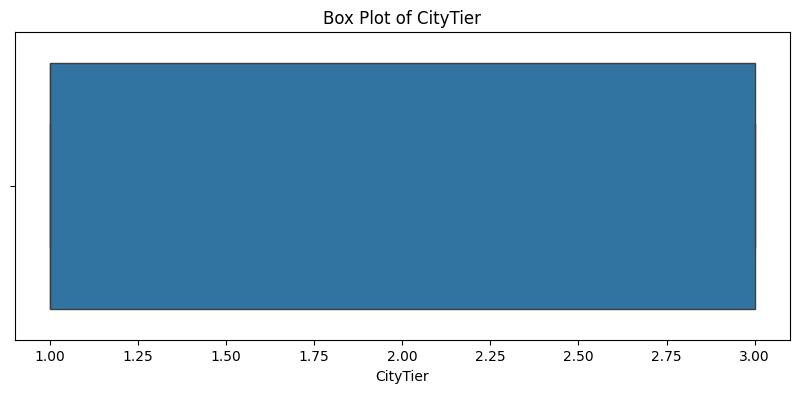

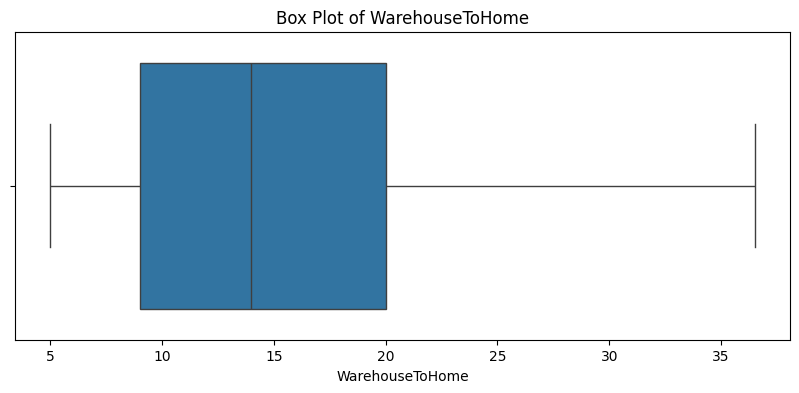

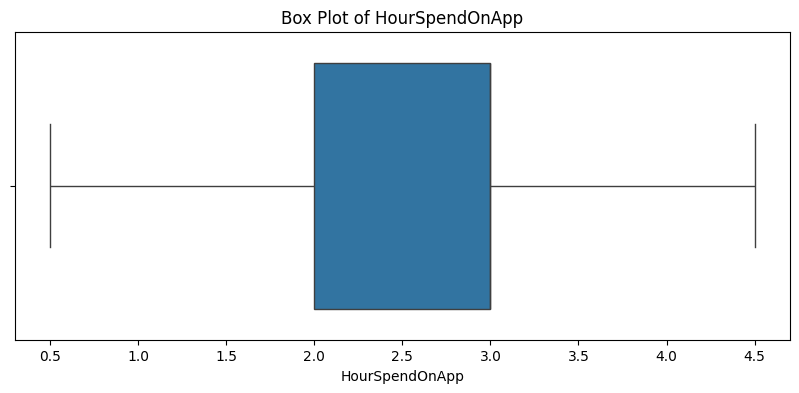

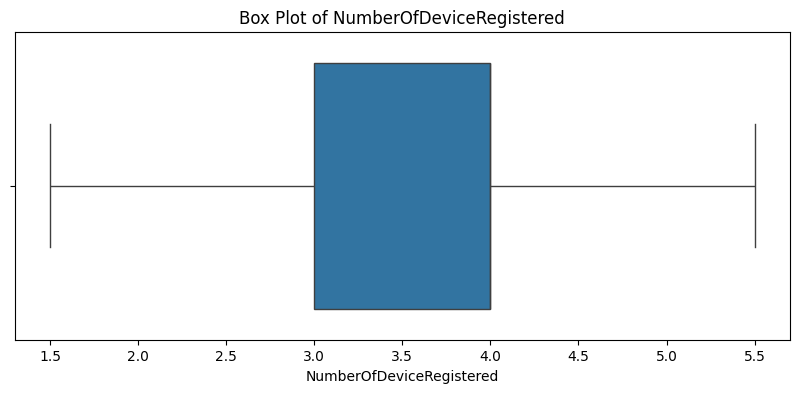

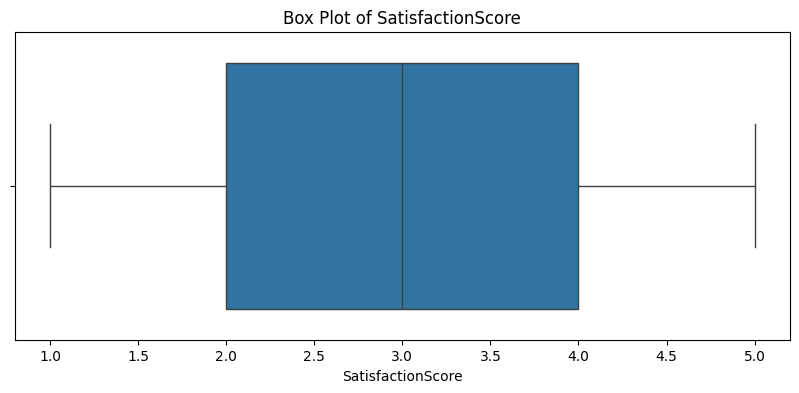

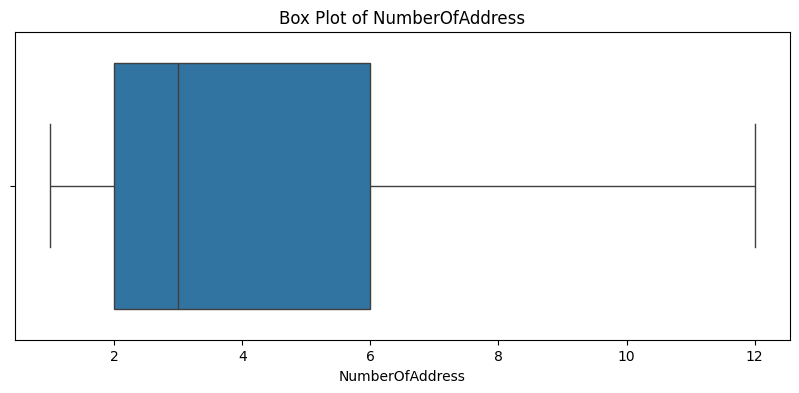

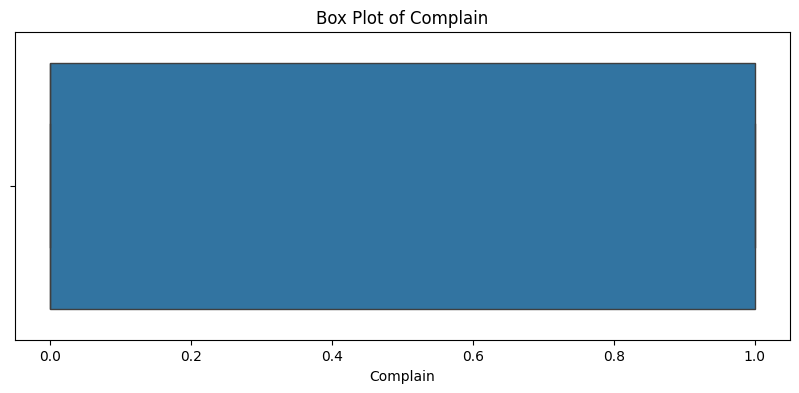

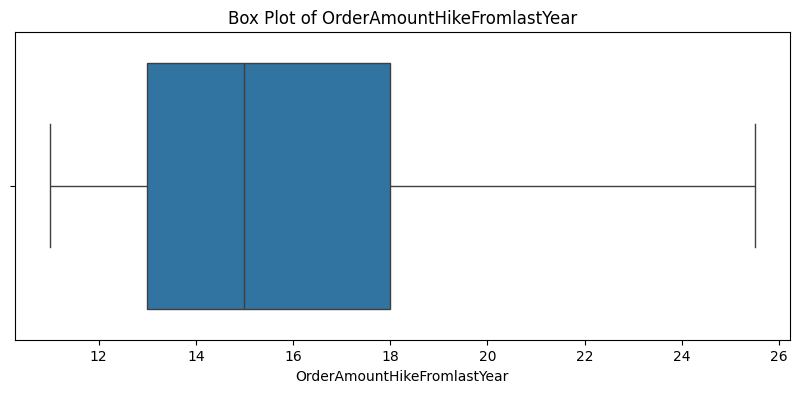

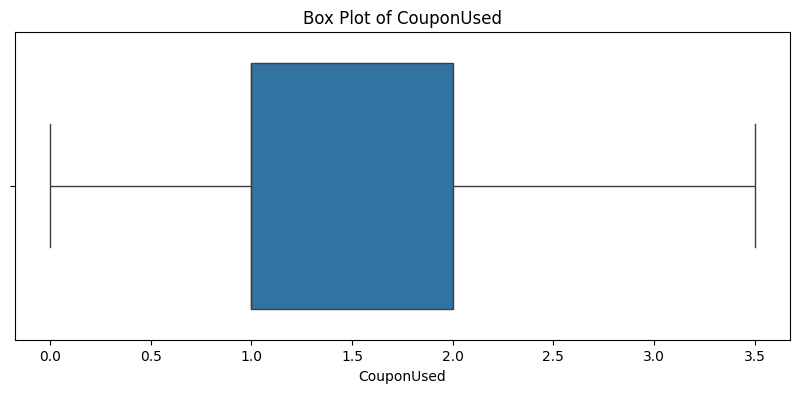

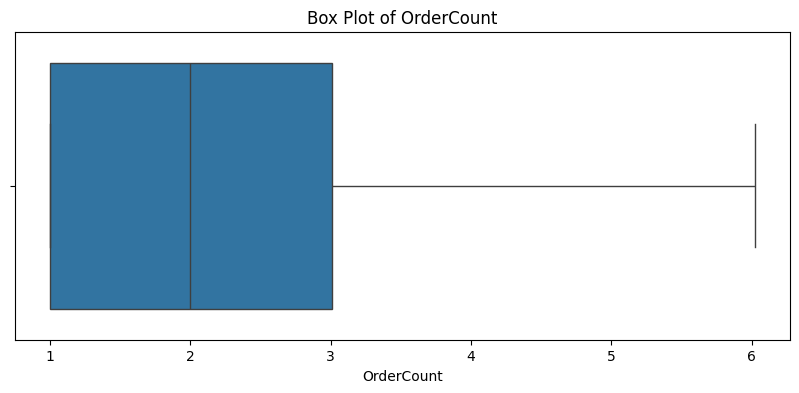

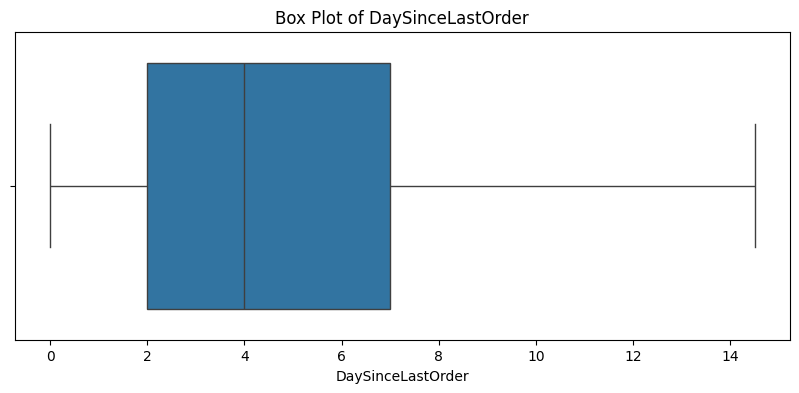

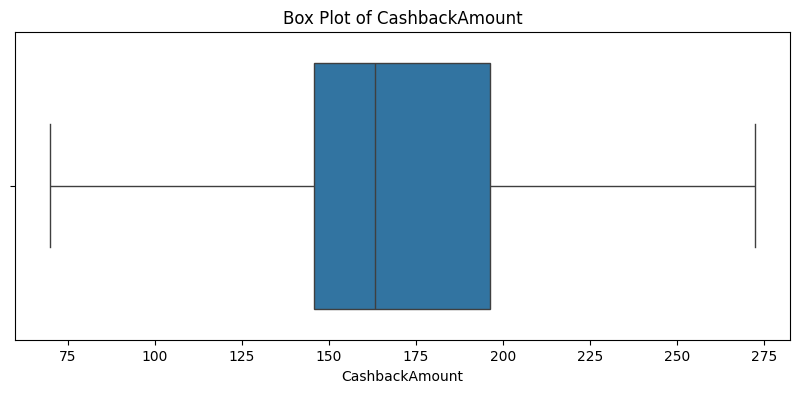

In [65]:
# Melakukan Handling Outlier Data
cols_to_clean = [col for col in num_cols if col not in ['Churn', 'CustomerID']]

# Proses Capping (Mengganti nilai ekstrim)
for feature in cols_to_clean:
    # Hitung Q1, Q3, dan IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Tentukan Batas
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    # Capping (Ganti nilai yang > upper dengan upper, < lower dengan lower)
    df[feature] = np.where(df[feature] > upper_limit, upper_limit, df[feature])
    df[feature] = np.where(df[feature] < lower_limit, lower_limit, df[feature])


# Visualisasi Hasil
for feature in num_cols:
  plt.figure(figsize=(10, 4))
  sns.boxplot(x=df[feature])
  plt.title(f'Box Plot of {feature}')
  plt.show()

In [67]:
# Mengubah kolom Object menjadi Angka
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
    print(f" - Kolom '{col}' berhasil diubah.")

print("\n--- Info Tipe Data Terbaru ---")
df.info()

 - Kolom 'PreferredLoginDevice' berhasil diubah.
 - Kolom 'PreferredPaymentMode' berhasil diubah.
 - Kolom 'Gender' berhasil diubah.
 - Kolom 'PreferedOrderCat' berhasil diubah.
 - Kolom 'MaritalStatus' berhasil diubah.

--- Info Tipe Data Terbaru ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   int64  
 4   CityTier                     5630 non-null   float64
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   int64  
 7   Gender                       5630 non-null   int64  
 8   HourSpendOnApp               5630 non-null   float64
 9 

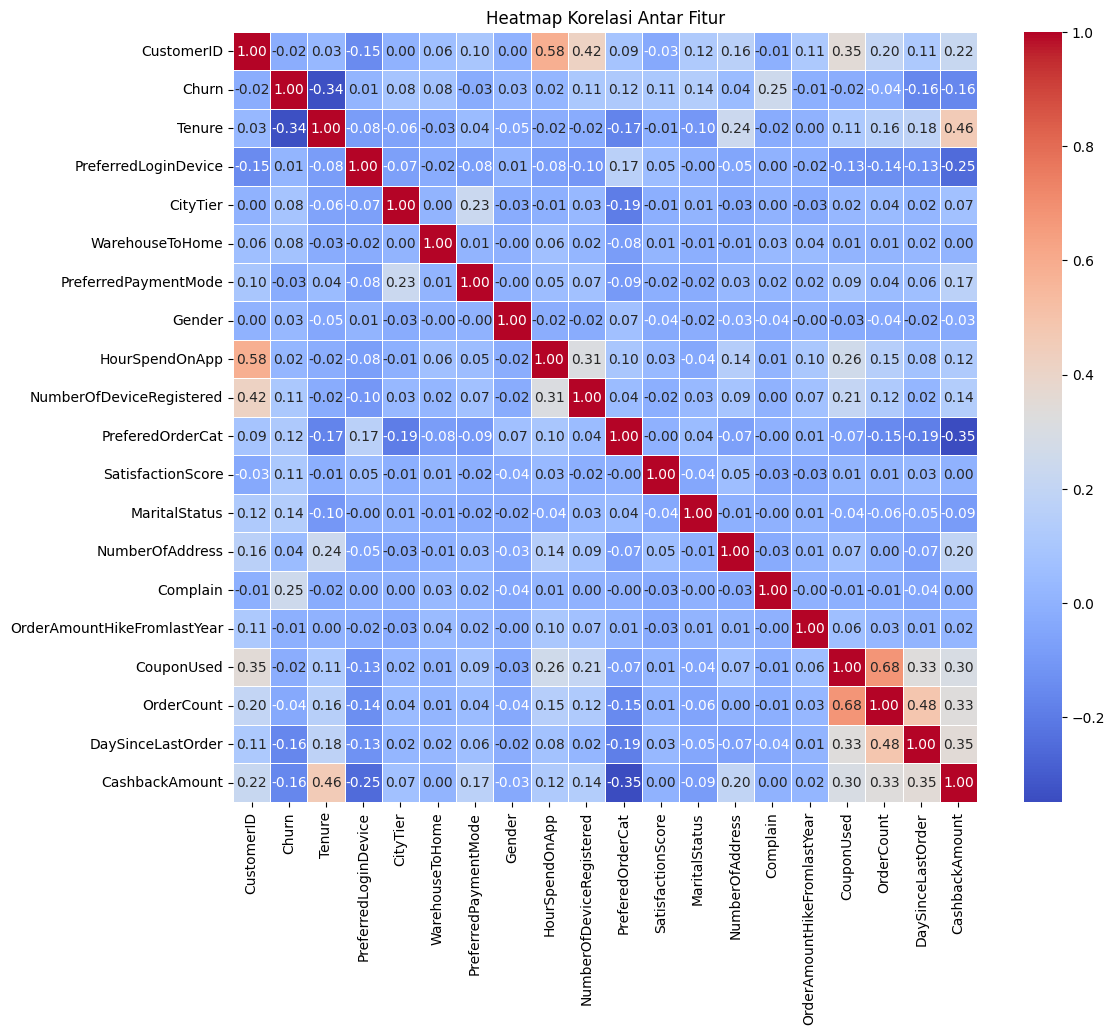

In [69]:
# Menampilkan korelasi antar fitur
plt.figure(figsize=(12, 10))

# Hitung correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

In [70]:
# 3. Simpan Data Final yang Sudah Bersih
df.to_csv('data_clean.csv', index=False)
print("\nBerhasil Menyimpan!")


Berhasil Menyimpan!


# Training Model Sementara

In [72]:
# 1. Definisikan Fitur (X) dan Target (y)
X = df.drop(['Churn', 'CustomerID'], axis=1)
y = df['Churn']

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perbarui daftar kolom numerik yang akan diskala berdasarkan X_train yang sudah final
# Setelah encoding dan drop 'CustomerID', semua kolom di X_train adalah numerik dan perlu diskala.
scaling_cols = X_train.columns

# Buat preprocessor yang akan menangani scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), scaling_cols)
    ])

# Buat pipeline yang menggabungkan preprocessor dan model
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', RandomForestClassifier(random_state=42))])

# 3. Latih Model (Eksperimen)
model_pipeline.fit(X_train, y_train)

# 4. Cek Hasil
y_pred = model_pipeline.predict(X_test)
print(f"Akurasi Sementara di Notebook: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Akurasi Sementara di Notebook: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       941
           1       1.00      0.88      0.94       185

    accuracy                           0.98      1126
   macro avg       0.99      0.94      0.96      1126
weighted avg       0.98      0.98      0.98      1126


Confusion Matrix:
[[941   0]
 [ 22 163]]
